# Functions to extract information from IFCB file names and process them into a pandas DF with information for Date, Time, and Instrument

In [7]:
import os
import re
import pandas as pd
from datetime import datetime

def extract_info(filename):
    """
    Function to extract date, time, and IFCB number from filename
    Date will be in date format, time will be in time format, and instrument will be an integer

    Files should follow format:
    Taking this data file as an example: "D20120415T065129_IFCB010_00250" the date is 04-15-2012 time is 06:51:29 UTC instrument is #10
    """
    date_str = filename[1:9]
    time_str = filename[10:16]
    ifcb_number = filename[21:24]

    date = datetime.strptime(date_str, "%Y%m%d").date()
    time = datetime.strptime(time_str, "%H%M%S").time()
    instrument = int(ifcb_number)

    return date, time, instrument

def process_files_in_directory(directory_path):
    """
    Processes files in a directory, filtering those that match a specific filename pattern,
    extracting relevant information, and organizing it into a DataFrame.

    Parameters:
    directory_path (str): The path of the folder containing the files.

    Returns:
    DataFrame: A pandas DataFrame with the extracted information (Date, Time, Instrument).
    """
    # Define the expected pattern
    pattern = re.compile(r'^D\d{8}T\d{6}_IFCB\d{3}_\d{5}\.png$')
    
    try:
        # List files in the directory
        dir_list = os.listdir(directory_path)

        # Filter files that do not match the pattern
        different_format_files = [file for file in dir_list if not pattern.match(file)]
        print(f"Files that have alternative formats:", different_format_files)
        # Calculate the percentage of files that don't match the expected format
        total_files = len(dir_list)
        percent_different_format = (len(different_format_files) / total_files) * 100
        print(f"Percentage of files that don't match the expected format: {percent_different_format:.2f}%")

        # Remove files in different_format_files from dir_list
        dir_list = [file for file in dir_list if file not in different_format_files]

        # Extract information from the remaining files
        data = [extract_info(file) for file in dir_list]

        # Create a DataFrame
        df = pd.DataFrame(data, columns=['Date', 'Time', 'Instrument'])
        return df

    except FileNotFoundError:
        print(f"The folder {directory_path} does not exist.")
        return None

# Ex usage
#df = process_files_in_directory("path")
#print(df)


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_distributions(df, suptitle="Data Distributions", save_path=None):
    """
    Plots the distributions of dates, times, and instruments from the DataFrame.
    Optionally saves the plots to a file.

    Parameters:
    df (DataFrame): A pandas DataFrame containing 'Date', 'Time', and 'Instrument' columns.
    suptitle (str): The super title for the combined plots.
    save_path (str): The file path to save the plot (e.g., "output.png"). If None, the plot won't be saved.
    """
    # Convert 'Date' column to datetime if not already in that format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Create figure and axes
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))
    fig.suptitle(suptitle, fontsize=16)

    # Plot 1: Distribution of Dates
    df['Date'].value_counts().sort_index().plot(kind='bar', ax=axs[0])
    axs[0].set_title('Distribution of Dates')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Frequency')
    axs[0].tick_params(axis='x', rotation=90)

    # Plot 2: Distribution of Times (Hour of Day)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
    df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

    # Create a series with all hours of the day
    all_hours = pd.Series(range(24), name='Hour')

    # Count occurrences of each hour and reindex to include all hours
    hour_counts = df['Hour'].value_counts().sort_index().reindex(all_hours, fill_value=0)

    hour_counts.plot(kind='bar', ax=axs[1])
    axs[1].set_title('Distribution of Times (Hour of the Day)')
    axs[1].set_xlabel('Hour of the Day')
    axs[1].set_ylabel('Frequency')
    axs[1].tick_params(axis='x', rotation=90)

    # Plot 3: Distribution of Instruments
    df['Instrument'].value_counts().sort_index().plot(kind='bar', ax=axs[2])
    axs[2].set_title('Distribution of Instruments')
    axs[2].set_xlabel('Instrument')
    axs[2].set_ylabel('Frequency')

    # Adjust layout to prevent overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved to {save_path}")

    # Show the plot
    plt.show()


## Alexandrium catenella

Files that have alternative formats: ['IFCB1_2009_146_015423_01476.png', 'IFCB1_2014_156_185244_00144.png', 'IFCB1_2015_133_191525_06682.png', 'IFCB5_2013_139_182814_01921.png', 'IFCB5_2013_144_015540_01022.png']
Percentage of files that don't match the expected format: 0.33%
Plot saved to /Users/cristianswift/Desktop/WHOI/2024-Fall-Research/IFCB-Temporal-Distributions/IFCB-distributions/Alexandrium_catenella.png


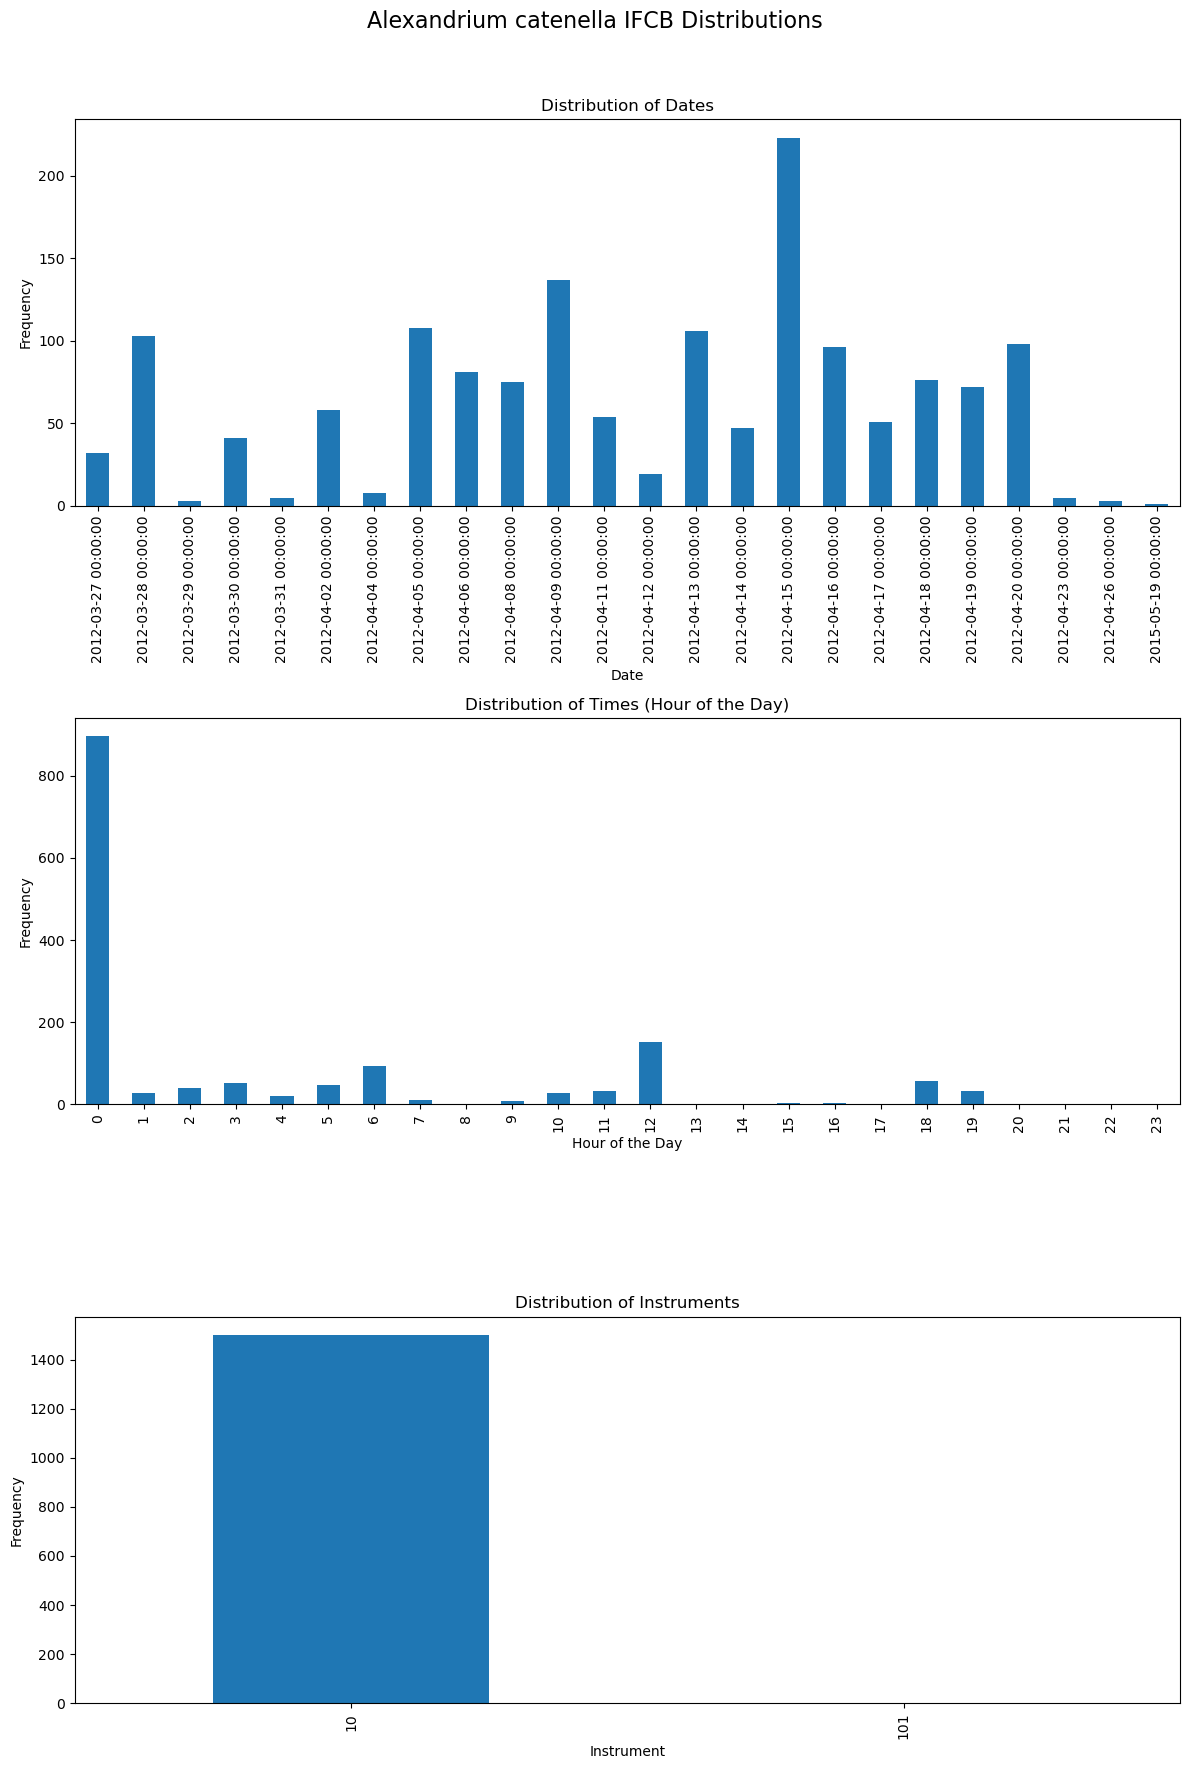

In [9]:

alex_path = "/Volumes/Vortex/cnn/training_sets/IFCB/HABLAB_20220819/Alexandrium_catenella"
alex = process_files_in_directory(alex_path)
alex['Instrument'].unique()
alex_save = "/Users/cristianswift/Desktop/WHOI/2024-Fall-Research/IFCB-Temporal-Distributions/IFCB-distributions/Alexandrium_catenella.png"
plot_distributions(alex, suptitle="Alexandrium catenella IFCB Distributions", save_path=alex_save)

## Akashowio

Files that have alternative formats: ['Confounded', 'Extra', 'Mistakes', 'IFCB1_2012_269_132047_00102.png', 'IFCB1_2012_269_204116_04445.png', 'IFCB1_2012_282_200950_00144.png', 'IFCB1_2012_282_203258_00131.png', 'IFCB1_2012_282_203258_00260.png', 'IFCB1_2012_283_161011_00270.png', 'IFCB1_2012_283_200218_00078.png', 'IFCB1_2012_283_235416_00286.png', 'IFCB1_2012_284_032300_00553.png', 'IFCB1_2012_284_073819_00479.png', 'IFCB1_2012_284_095734_00502.png', 'IFCB1_2012_284_132015_00610.png', 'IFCB1_2012_284_134328_00059.png', 'IFCB1_2012_284_151620_00798.png', 'IFCB1_2012_286_204839_00485.png', 'IFCB1_2012_287_101504_00336.png', 'IFCB1_2012_295_171140_02654.png', 'IFCB1_2012_295_175803_03590.png', 'IFCB1_2012_295_223026_01168.png', 'IFCB1_2012_295_225342_01521.png', 'IFCB1_2014_277_003324_01260.png', 'IFCB1_2014_277_031553_08625.png', 'IFCB1_2014_277_073118_08214.png', 'IFCB1_2014_277_092722_01590.png', 'IFCB1_2014_277_095038_02970.png', 'IFCB1_2014_277_095038_08154.png', 'IFCB1_2014_277_1

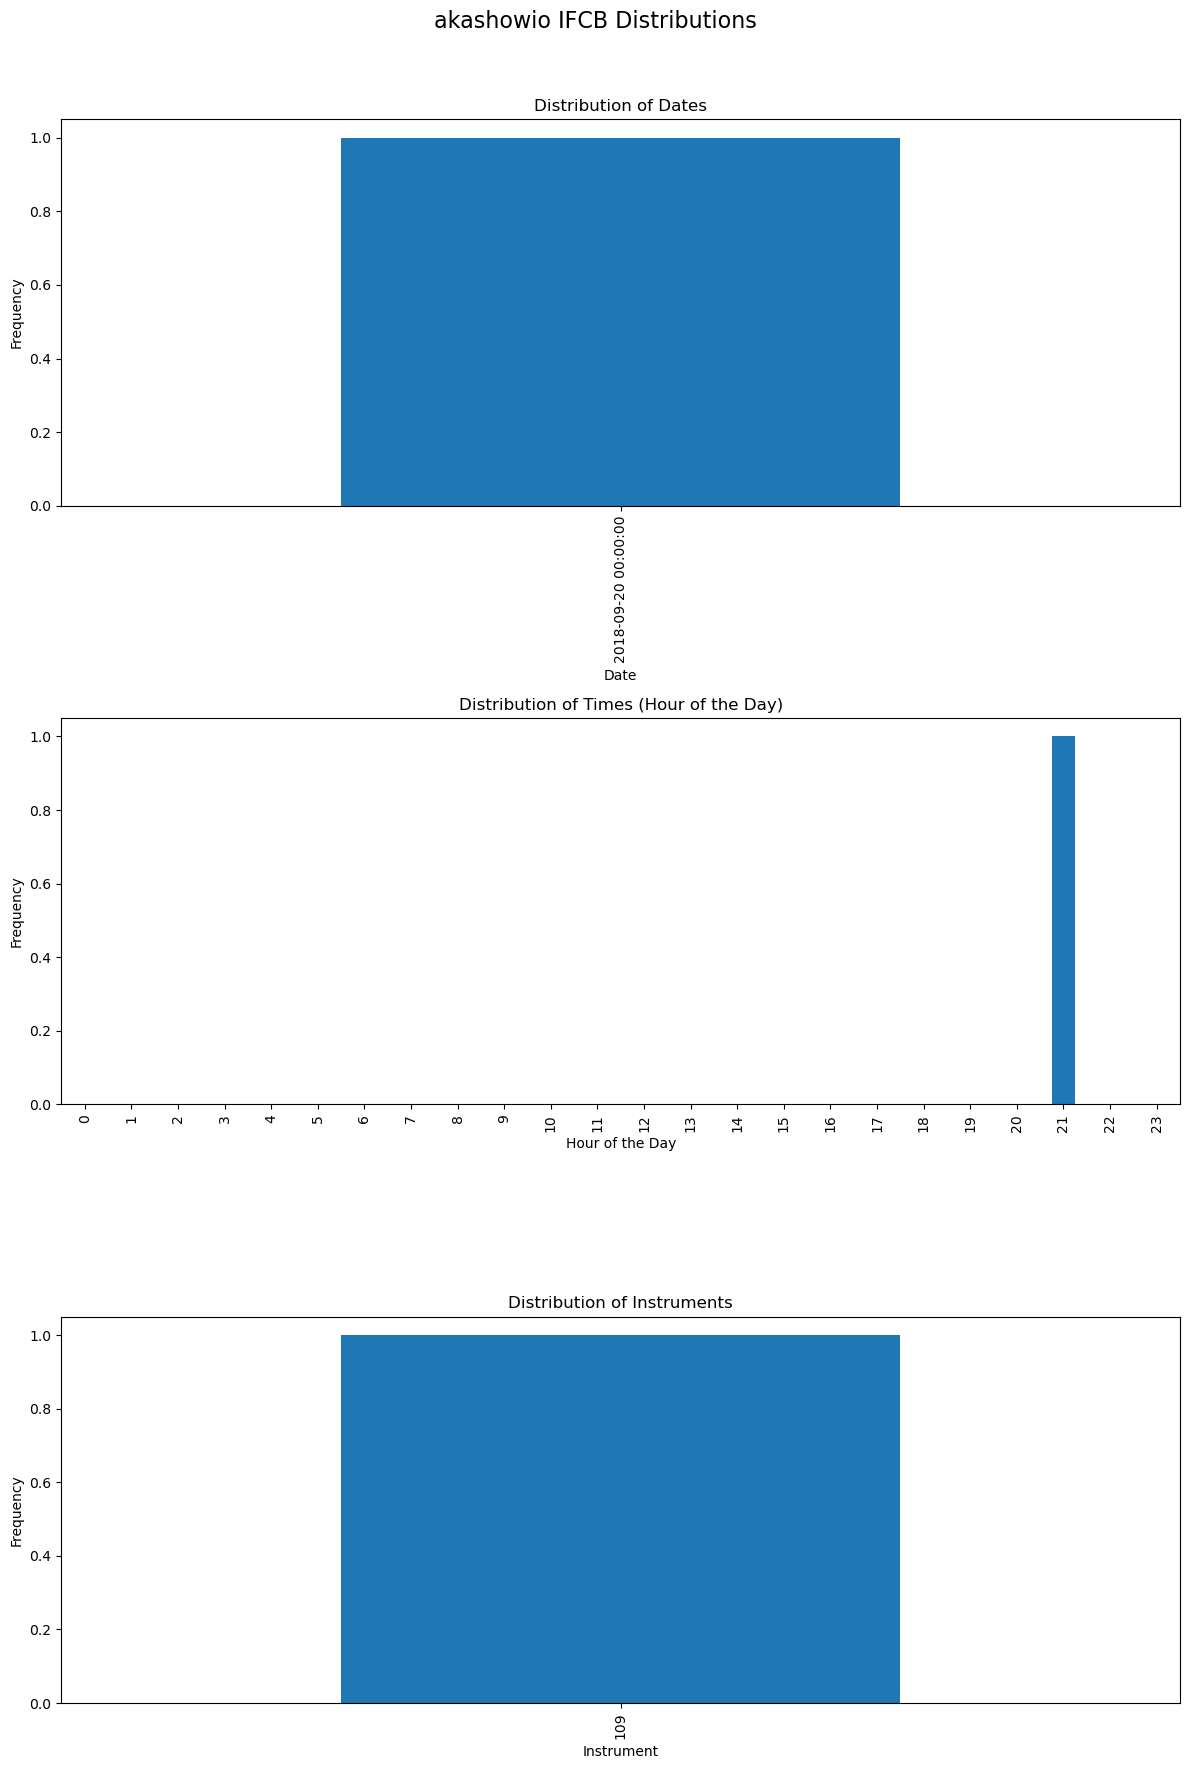

In [12]:
akashowio_path = "/Volumes/Vortex/cnn/training_sets/IFCB/HABLAB_20220819/Akashiwo"
akashowio = process_files_in_directory(akashowio_path)
akashowio['Instrument'].unique()
akashowio_save = "/Users/cristianswift/Desktop/WHOI/2024-Fall-Research/IFCB-Temporal-Distributions/IFCB-distributions/akashowio.png"
plot_distributions(akashowio, suptitle="akashowio IFCB Distributions", save_path=akashowio_save)